<a href="https://colab.research.google.com/github/Luciahelenasantos/PUC-SPRINT-III/blob/main/MVP_SPRINTIII_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint III - PUC Rio

## Aluna : Lucia Helena Barros dos Santos

# Descrição do Problema:

Estudos sobre poluentes atmosféricos são cada vez mais necessários a partir de agora, profundas mudanças climáticas estão sendo observadas e apresentando uma tendência de crescimento e agravamento de fenômenos climáticos, assim tais estudos tornam-se cruciais e afetando de forma direta várias questões que afetam o cotidiano da população mundial.
Vários são os assuntos relevantes quando se refere à estudos de poluentes:

•	O impacto na saúde humana dado que a poluição do ar está diretamente relacionada a uma série de problemas de saúde, incluindo doenças respiratórias, cardiovasculares e câncer.

•	A preservação do meio ambiente, pois poluentes atmosféricos podem causar danos ao meio ambiente, incluindo a acidificação de corpos d'água, danos a ecossistemas terrestres e aquáticos, e a destruição da camada de ozônio (O3).

•	O combate às mudanças climáticas, onde estudos sobre poluentes atmosféricos podem auxiliar na promoção de desenvolvimento sustentável.

•	A conformidade regulatória, é de conhecimento que muitos países têm regulamentações estritas relacionadas à qualidade do ar e limites de emissões de poluentes.

•	No desenvolvimento de tecnologias limpas, onde a pesquisa sobre poluentes atmosféricos impulsiona o desenvolvimento de tecnologias mais limpas e eficientes, tanto na indústria quanto no transporte, contribuindo para a redução das emissões dos mesmos.

•	A Sensibilização Pública, os estudos sobre poluentes atmosféricos aumentam a conscientização pública sobre a importância da qualidade do ar e da redução da poluição, incentivando ações individuais e coletivas, visando proteger o meio ambiente.

•	A tomada de Decisão Política, dados e conclusões de estudos sobre poluentes atmosféricos são essenciais para a formulação de políticas públicas eficazes relacionadas ao meio ambiente e à saúde.

Em virtude de tantos itens relevantes na proteção do meio ambiente e da saúde da população, o monitoramento da qualidade do ar passou a ter papel fundamental nos dias atuais e com perspectivas de crescimento e aprofundamento de estudos a respeito no futuro, assim tal fato sugeriu a análise do banco de dados encontrado na plataforma kaggle, contendo 10.980.514 (dez milhões novecentos e oitenta mil e quinhentos) registros, representando medições hora a hora realizadas por 87 estações meteorológicas distribuídas em localidades do Estado de São Paulo.

As medições referem-se à 9 poluentes atmosféricos, cuja unidade de medida é o “microgramas por metro cúbico” (µg/m³). Sendo estes considerados de grande importância no que tange ao monitoramento da qualidade do ar, temos: MP10 – Material Particulado 10, MP2.5 – Material particulado 2.5, O3 – Ozônio, NO2 - Dióxido de Nitrogênio, CO - Monóxido de Carbono, SO2 – Dióxido de Enxofre, NO – Óxido de Nitrogênio, PTS – Partículas Totais em Suspensão e FMC – Fumaça.

Dentre os 9 poluentes encontrados na base de dados, foram selecionados MP10, MP2.5, NO2 e O3 para o estudo em questão, permitindo a exploração dos dados afim de se fazer questionamentos com intuito de conhecer o comportamento e a evolução destes poluentes a nível temporal e geográfico.



# Carregando bibliotecas

In [1]:
# Importe as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import psycopg2

import warnings

from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
import os # para o retorno do caminho dos dados - 'os.chdir'

In [2]:
warnings.filterwarnings("ignore")

# Criando Funções

In [3]:
# Função que cria a variável Nmes com os nomes dos meses do ano

def calcula_nome_mes(mes):
  vmes = mes

  if mes == 1:
    return "Janeiro"
  elif mes == 2:
    return "Fevereiro"
  elif mes == 3:
    return "Março"
  elif mes == 4:
    return "Abril"
  elif mes == 5:
    return "Maio"
  elif mes == 6:
    return "Junho"
  elif mes == 7:
    return "Julho"
  elif mes == 8:
    return "Agosto"
  elif mes == 9:
    return "Setembro"
  elif mes == 10:
    return "Outubro"
  elif mes == 11:
    return "Novembro"
  else:
    return "Dezembro"


# Função que cria a variável num com valores numéricos para as estações do ano

def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month

  if vmes in (1,2):
    return "Verão"
  elif vmes == 3:
    if vdia < 21:
      return "Verão"
    else:
      return "Outono"
  elif vmes in (4,5):
      return "Outono"
  elif vmes == 6:
      if vdia < 21:
        return "Outono"
      else:
        return "Inverno"
  elif vmes in (7,8):
      return "Inverno"
  elif vmes == 9:
      if vdia < 21:
        return "Inverno"
      else:
        return "Primavera"
  elif vmes in (10,11):
      return "Primavera"
  elif vmes == 12:
      if vdia < 21:
        return "Primavera"
      else:
        return "Verão"

# Função que cria a variável Nmes com os períodos do dia em função da hora

def calcula_periodo_dia(hora):
    vhora = hora

    if vhora in ("00:00","01:00","02:00","03:00","04:00","05:00","06:00"):
      return "Madrugada"
    elif vhora in ("07:00","08:00","09:00","10:00","11:00","12:00"):
      return "Manhã"
    elif vhora in ("13:00","14:00","15:00","16:00","17:00","18:00"):
      return "Tarde"
    else:
      return "Noite"


# Preparando o Ambiente

In [4]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


# ***4 - Carregando os Dados***

In [5]:
# Importando o arquivo em formato csv hospedado em My Drive

caminho = "/content/drive/My Drive/dadoarsp/SP_poluicao_dados.csv"

dadoarsp = pd.read_csv(caminho, index_col=False, delimiter=',')

In [6]:
# Alterando o atributo Data de object para formato date

dadoarsp['Data'] = pd.to_datetime(dadoarsp['Data'])

In [7]:
# Suponha que você tenha um DataFrame chamado 'dadosarsp'

dadoarsp = dadoarsp.drop(columns=['Unnamed: 0'])

In [8]:
# Criando as variáveis Ano e Mes com formato date

dadoarsp['Ano'] = dadoarsp['Data'].dt.year
dadoarsp['Mes'] = dadoarsp['Data'].dt.month

In [9]:
# Criando a variável "nmes" dando nome aos meses dos anos

dadoarsp["nmes"] = dadoarsp["Mes"].apply(calcula_nome_mes)

In [10]:
# Criando a variável "estacao_ano" para identificar as estações climáticas

dadoarsp["estacao_ano"] = dadoarsp["Data"].apply(calcula_estacao_ano)

In [11]:
# Criando a variável "periodo_dia" para identificar manhã, tarde ou noite

dadoarsp["periodo_dia"] = dadoarsp["Hora"].apply(calcula_periodo_dia)

In [12]:
dadoarsp

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Ano,Mes,nmes,estacao_ano,periodo_dia
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica,2015,1,Janeiro,Verão,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,2,Fevereiro,Verão,Madrugada
10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,3,Março,Verão,Madrugada
10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,4,Abril,Outono,Madrugada
10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual,2021,5,Maio,Outono,Madrugada


In [13]:
dadoarsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ID           int64         
 1   Data         datetime64[ns]
 2   Hora         object        
 3   Estacao      object        
 4   Codigo       object        
 5   Poluente     object        
 6   Valor        float64       
 7   Unidade      object        
 8   Tipo         object        
 9   Ano          int64         
 10  Mes          int64         
 11  nmes         object        
 12  estacao_ano  object        
 13  periodo_dia  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 1.1+ GB


# ***5 - Análise Exploratória por poluente***

Nesta etapa, estudamos o comportamento dos poluentes selecionados, que, como mencionado anteriormente, além de terem influência na evolução de doenças respiratórias, podem interferir negativamente no ecossistema. Inicialmente, selecionamos as variáveis de interesse para cada um dos poluentes em questão, em função da observação dos valores apresentados.

É importante observar que, devido ao tamanho da base de dados e à falta de utilização de um ambiente apropriado de banco de dados, optou-se em realizar a exclusão do conjunto de dados (DATASET) utilizado no final de cada bloco de análise de determinado poluente, tal ação foi feita com o objetivo de não comprometer o desempenho do notebook, reforçando a ideia de que, para lidar com grandes volumes de dados, como é o caso, é de suma importância o uso de hospedagem de dados em nuvem, por meio da criação de um DATALAKE ou DATA WAREHOUSE.


### 5.1 - PM10

A relevância do estudo do poluente MP10 está atrelada aos impactos significativos para a saúde humana como problemas respiratórios, ou o agravamento de condições respiratórias pré-existentes (como asma e bronquite). Estudos revelam que a grande exposição a partículas MP10 está associada a um maior risco de doenças cardiovasculares, como ataques cardíacos e derrames, devido à inflamação sistêmica e ao estresse oxidativo.

Quanto às implicações ambientais o poluente PM10 contribui para a má qualidade do ar, afetando a visibilidade do ambiente e causando problemas de saúde em animais selvagens e ecossistemas, além de transportar poluentes atmosféricos, incluindo nutrientes como nitrogênio e enxofre, que, quando depositados no solo ou na água, também podem afetar negativamente ecossistemas terrestres e aquáticos, prejudicando a biodiversidade e a qualidade geral do meio ambiente.


In [14]:
# Selecionando no banco dadoarsp o poluentes MP10

dadoarMP10 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano']]
dadoarMP10 = dadoarMP10.loc[  dadoarMP10 ['Poluente'] == 'MP10' ]

In [15]:
# Verificando o banco dadoarMP10

dadoarMP10

,Data,Estacao,Poluente,Valor,Ano,estacao_ano
0,2015-01-01,Americana - Vila Santa Maria,MP10,65.0,2015,Verão
1,2015-01-01,Americana - Vila Santa Maria,MP10,98.0,2015,Verão
2,2015-01-01,Americana - Vila Santa Maria,MP10,79.0,2015,Verão
3,2015-01-01,Americana - Vila Santa Maria,MP10,53.0,2015,Verão
4,2015-01-01,Americana - Vila Santa Maria,MP10,35.0,2015,Verão
...,...,...,...,...,...,...
10980190,2021-11-20,Santa Gertrudes - Jd. Luciana,MP10,24.0,2021,Primavera
10980191,2021-11-26,Santa Gertrudes - Jd. Luciana,MP10,27.0,2021,Primavera
10980192,2021-12-02,Santa Gertrudes - Jd. Luciana,MP10,49.0,2021,Primavera
10980193,2021-12-08,Santa Gertrudes - Jd. Luciana,MP10,53.0,2021,Primavera


In [16]:
# Sumário estatístico para o poluentes MP10, afim de se obter a média dos
# valores do poluente a ser utilizada nos gráficos

descricao_valor = dadoarMP10['Valor'].describe()
print(descricao_valor)

count    2.883216e+06
mean     2.920784e+01
std      2.595918e+01
min      0.000000e+00
25%      1.300000e+01
50%      2.200000e+01
75%      3.700000e+01
max      1.924000e+03
Name: Valor, dtype: float64


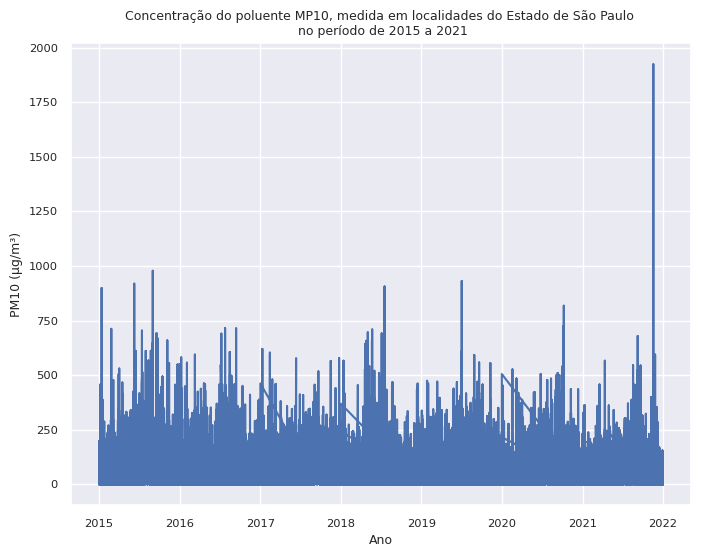

In [17]:
# Gráfico de linhas da série histórica do poluente PM10

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.figure(figsize=(8, 6))
plt.ylabel("PM10 (µg/m³)")
plt.xlabel("Ano")
plt.plot(dadoarMP10['Data'], dadoarMP10['Valor'])
plt.title('Concentração do poluente MP10, medida em localidades do Estado de São Paulo \n no período de 2015 a 2021')
plt.show()

O gráfico de linhas permite verificar um comportamento atípico ocorrido no ano de 2021 para o poluente MP10, sendo assim um ano que sugere investigação em relação ao período do ano e em que local ocorreu tal compotamento.

Em função desta observação é criado um DATASET com dados referetente ao ano de 2021 e valores válidos a seguir.

In [18]:
# Selecionando valores MP10 para o Ano de 2021

dadoarMP10_2021 = dadoarMP10[(dadoarMP10['Ano'] == 2021) & (dadoarMP10['Valor'] > 0)]

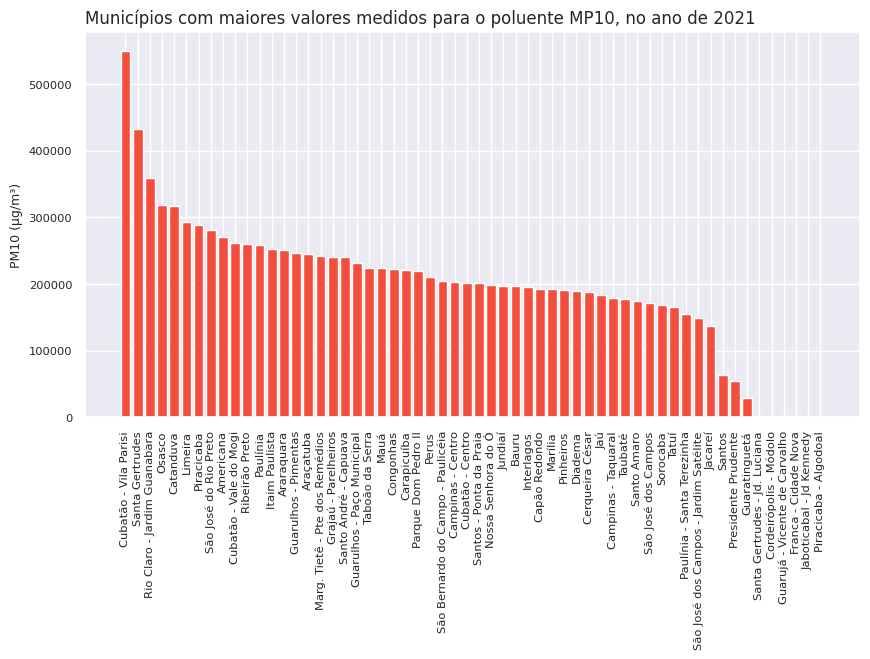

In [19]:
# analise por Municípios ao longo do período 2015 - 2022

Graf_Munic = dadoarMP10_2021.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10, 5) )
plt.title( 'Municípios com maiores valores medidos para o poluente MP10, no ano de 2021', loc='left', fontsize=12 )
plt.bar( Graf_Munic.Estacao, Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('PM10 (µg/m³)')
plt.xticks( rotation=90 );

Interessante obervar que o DATASET "dadoarMP10_2021" criado, permitiu através do gráfico anterior observar que no ano de 2021, o valor atípico do poluente MP10 ocorreu na estação de Cubatão - Vila Parisi.

In [20]:
# Consulta para o valor máximo do poluente MP10

resultado = dadoarMP10_2021[dadoarMP10_2021['Valor'] == 1924]
# Verifique se algum registro foi encontrado
if not resultado.empty:
    print("Registro encontrado:")
    print(resultado)
else:
    print("Registro não encontrado.")

Registro encontrado:
              Data                Estacao Poluente   Valor   Ano estacao_ano
9820871 2021-11-18  Cubatão - Vila Parisi     MP10  1924.0  2021   Primavera


Na variável 'descricao_valor' foi obtido o valor máximo que o poluente MP10 atingiu no período observado, possibilitando desta forma verificar, não apenas a Estação de ocorrência mas também a data, sendo esta em 18 de novembro de 2021, na estação da primavera.

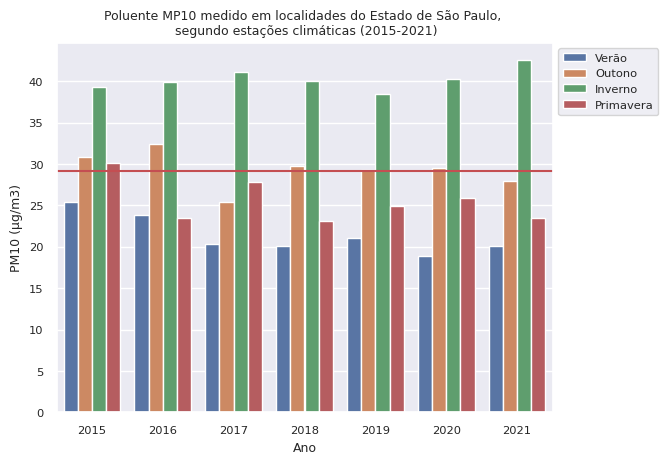

In [21]:
# Gráfico de barras referente à PM10

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarMP10, errorbar=None);
plt.axhline(y=29.20, color='r', linestyle='-')
plt.title("Poluente MP10 medido em localidades do Estado de São Paulo, \n segundo estações climáticas (2015-2021)")
plt.ylabel("PM10 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

Analisando o comportamento do poluente MP10 pelo gráfico de barras anterior, verica-se que o mesmo apresenta valores altos sempre no inverno, estes inclusive acima da média observada representada pela linha vermelha com valor de 29.20 µg/m3.

Ainda que tenha apresntado valores acima da média, o poluente ao longo do período, não superou o valor estabelecido pela Organização Mundial de Saúde (OMS) como sendo o limite aceitávvel para curta exposição no valor de 50 µg/m3.

In [22]:
# Apagando as tabelas utilizadas na análise do poluente MP10

tabelasMP10 = [dadoarMP10,dadoarMP10_2021]
for tabela in tabelasMP10:
    del tabela

### 5.2 - PM2.5

Embora ambos MP10 e MP2.5 possam ser prejudiciais à saúde, as partículas PM2.5 são consideradas mais agressivas devido ao seu tamanho menor, e por consequência, apresentarem maior capacidade de penetração nos pulmões e na corrente sanguínea com impacto mais grave na saúde humana.

As partículas do poluente MP2.5 podem atingir os alvéolos pulmonares, onde ocorrem as trocas gasosas, possibilitando causar danos mais sérios, estando assim associada a um maior risco de doenças cardiovasculares, câncer de pulmão, ataques cardíacos e até mesmo morte prematura.

Muitos países têm regulamentações mais rigorosas para MP2.5, daí a importância do monitoramento deste poluente para avaliar a qualidade do ar, devido a atenção especial ser dada às partículas menores.


In [23]:
# Selecionando no banco dadoarsp o poluentes MP2.5

dadoarMP2_5 = dadoarsp[['Data','Estacao','Poluente','Valor','Ano','estacao_ano','nmes','Mes','periodo_dia','Hora']]
dadoarMP2_5 = dadoarMP2_5.loc[  dadoarMP2_5 ['Poluente'] == 'MP2.5' ]

In [24]:
# Verificando o banco dadoarMP2_5

dadoarMP2_5

,Data,Estacao,Poluente,Valor,Ano,estacao_ano,nmes,Mes,periodo_dia,Hora
112369,2015-06-18,Campinas - Vila União,MP2.5,11.0,2015,Outono,Junho,6,Manhã,12:00
112370,2015-06-18,Campinas - Vila União,MP2.5,11.0,2015,Outono,Junho,6,Tarde,13:00
112371,2015-06-18,Campinas - Vila União,MP2.5,14.0,2015,Outono,Junho,6,Tarde,14:00
112372,2015-06-18,Campinas - Vila União,MP2.5,11.0,2015,Outono,Junho,6,Tarde,15:00
112373,2015-06-18,Campinas - Vila União,MP2.5,15.0,2015,Outono,Junho,6,Tarde,16:00
...,...,...,...,...,...,...,...,...,...,...
10980334,2021-11-14,Santo André - Capuava,MP2.5,8.0,2021,Primavera,Novembro,11,Madrugada,01:00
10980335,2021-11-20,Santo André - Capuava,MP2.5,7.0,2021,Primavera,Novembro,11,Madrugada,01:00
10980336,2021-11-26,Santo André - Capuava,MP2.5,11.0,2021,Primavera,Novembro,11,Madrugada,01:00
10980337,2021-12-02,Santo André - Capuava,MP2.5,9.0,2021,Primavera,Dezembro,12,Madrugada,01:00


In [25]:
descricao_valor = dadoarMP2_5['Valor'].describe()
print(descricao_valor)

count    1.224587e+06
mean     1.575639e+01
std      1.369854e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.100000e+01
max      9.200000e+02
Name: Valor, dtype: float64


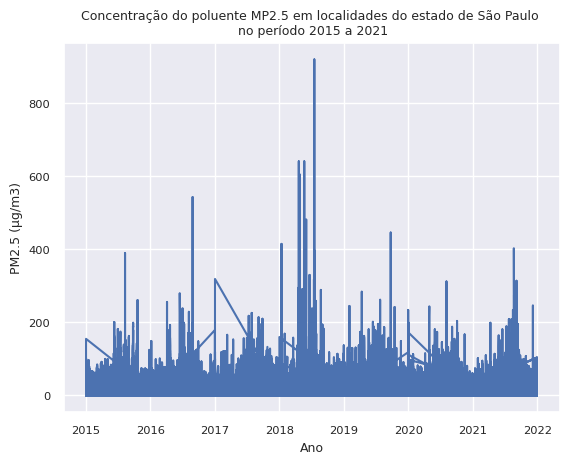

In [26]:
# Gráfico de linhas da série histórica do poluente PM2.5

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("PM2.5 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarMP2_5['Data'], dadoarMP2_5['Valor'])
plt.title('Concentração do poluente MP2.5 em localidades do estado de São Paulo \n no período 2015 a 2021');

O gráfico acima da série longitudinal no período, aponta alta de concentração do poluente MP2.5, nos anos de 2015, 2016 e principalmente no ano de 2018, com o valor destoando de maneira considerável neste último ano, tal ano é passível de análise afim de verificar o local de ocorrência.

In [40]:
# Selecionando valores MP10 para o Ano de 2015 2016 2017

dadoarMP2_5_2015 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2015) & (dadoarMP2_5['Valor'] > 0)]
dadoarMP2_5_2016 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2016) & (dadoarMP2_5['Valor'] > 0)]
dadoarMP2_5_2018 = dadoarMP2_5[(dadoarMP2_5['Ano'] == 2018) & (dadoarMP2_5['Valor'] > 0)]

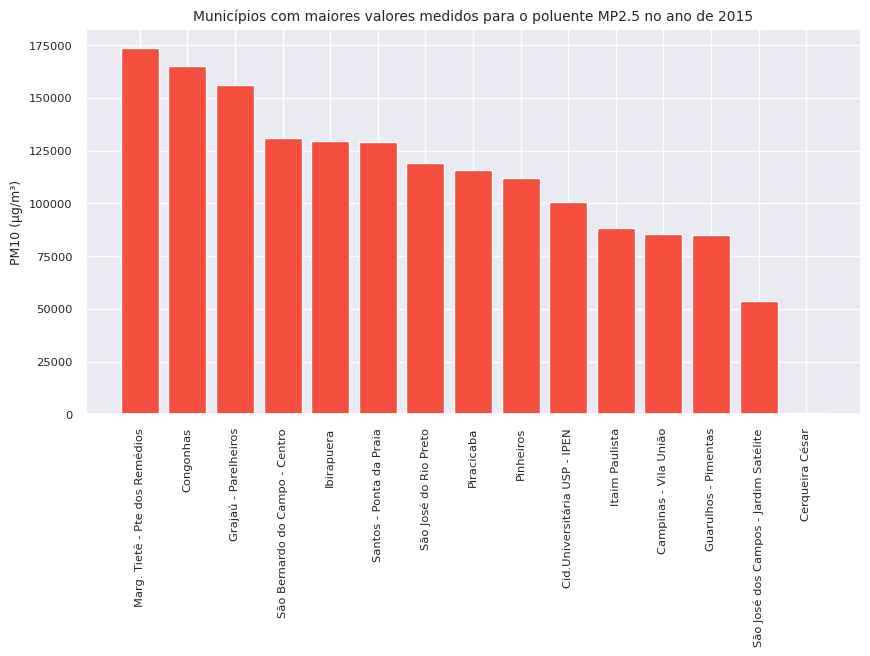

In [41]:
# analise por Municípios ao longo no ano de 2015

Graf_Munic = dadoarMP2_5_2015.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Municípios com maiores valores medidos para o poluente MP2.5 no ano de 2015', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('PM10 (µg/m³)')
plt.xticks( rotation=90 );

Para o ano de 2015 as estações com maiores valores demonstrados para o poluente em questão, foram: Marg. Tietê - Pte dos Remédios, Congonhas e Grajaú Palhereiros. Muitos podem ser os motivos para a alto do poluente na primeira estação citada, porém é de conhecimento que em tal localidade ocorre alto fluxo de veículos.

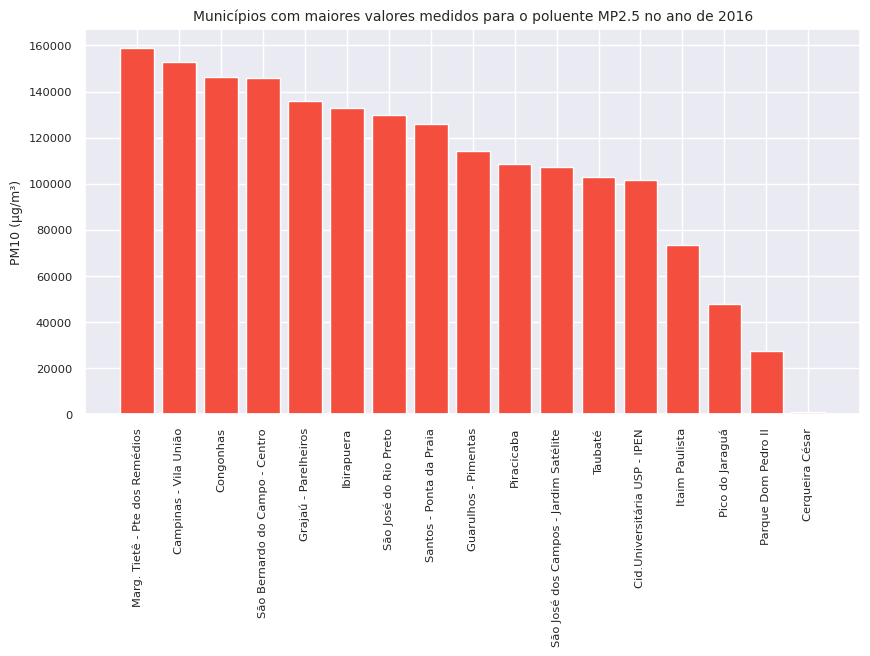

In [42]:
# analise por Municípios ao longo no ano de 2016

Graf_Munic = dadoarMP2_5_2016.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Municípios com maiores valores medidos para o poluente MP2.5 no ano de 2016', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('PM10 (µg/m³)')
plt.xticks( rotation=90 );

Para o ano de 2016 o gráfico acima ainda confirma a baixa qualidado do ar no que tange ao poluente MP2.5, para a estação Marg. Tietê - Pte dos Remédios, estando agora diferente do ano anterior, seguido de Campinas - Vila União, e também confirmando a estação de Congonhas, devido ao alto nível tráfego veicular especialmente aqueles que funcionam com combustíveis fósseis, além da presença de presença de indústrias, fábricas e atividades comerciais.

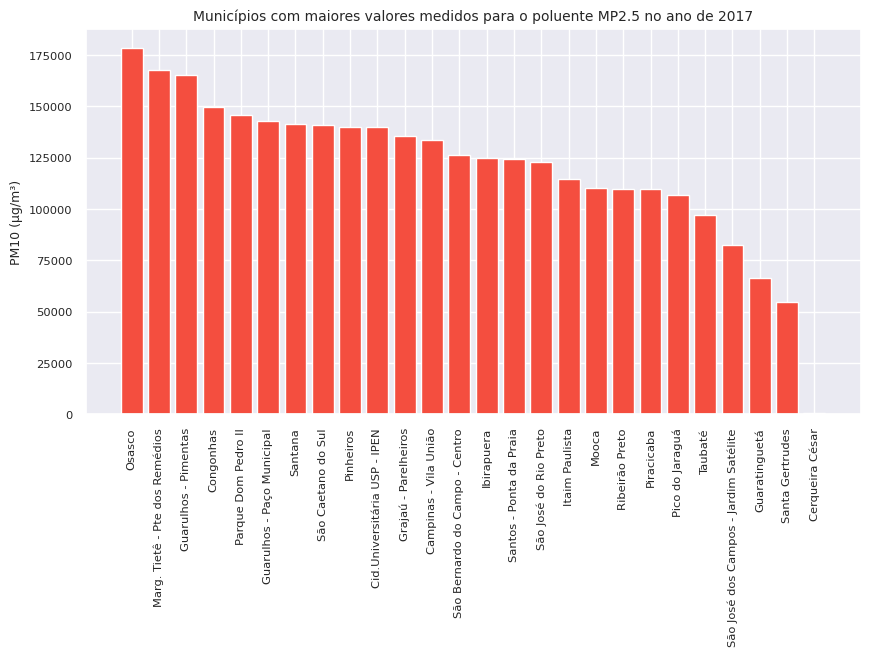

In [43]:
# analise por Municípios ao longo no ano de 2018

Graf_Munic = dadoarMP2_5_2018.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Municípios com maiores valores medidos para o poluente MP2.5 no ano de 2017', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('PM10 (µg/m³)')
plt.xticks( rotation=90 );

No ano de 2018 ressalta a inserção da estação de Guarulhos - Pimentas, além das outras anteriormente citadas. É importante para a tomada de políticas públicas a observação e a pesquisa nestas localidades, com o propósito de vericar a ocorrência de algum fenômeno ou evento ocorrido na localidade de Guarulhos no ano.

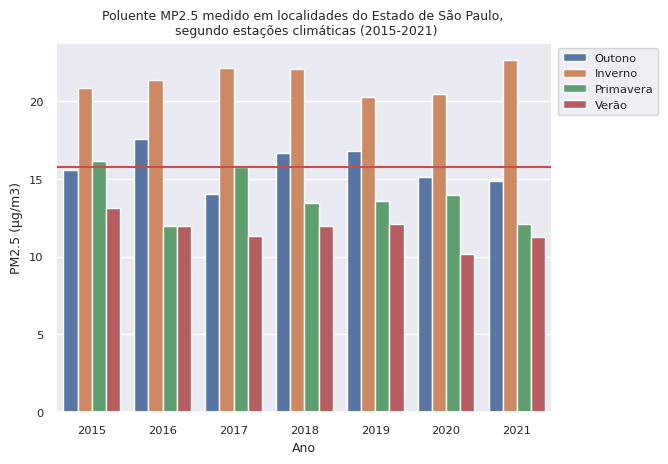

In [44]:
# Gráfico de barras referente ao poluente PM2.5

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarMP2_5, errorbar=None);
plt.axhline(y=15.75, color='r', linestyle='-')
plt.title("Poluente MP2.5 medido em localidades do Estado de São Paulo, \n segundo estações climáticas (2015-2021)")
plt.ylabel("PM2.5 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

In [54]:
# Selecionando no banco dadoarMP2_5 os Anos de 2016 a 2016 a 2018 e 2021

dadoarMP2_5_2015_2021 = dadoarMP2_5[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarMP2_5_2015_2021 = dadoarMP2_5_2015_2021.loc[ ( dadoarMP2_5 ['Ano'] == 2015) | (dadoarMP2_5 ['Ano'] == 2016) | ( dadoarMP2_5 ['Ano'] == 2017) |
                                                   ( dadoarMP2_5 ['Ano'] == 2018) | ( dadoarMP2_5 ['Ano'] == 2021) ]

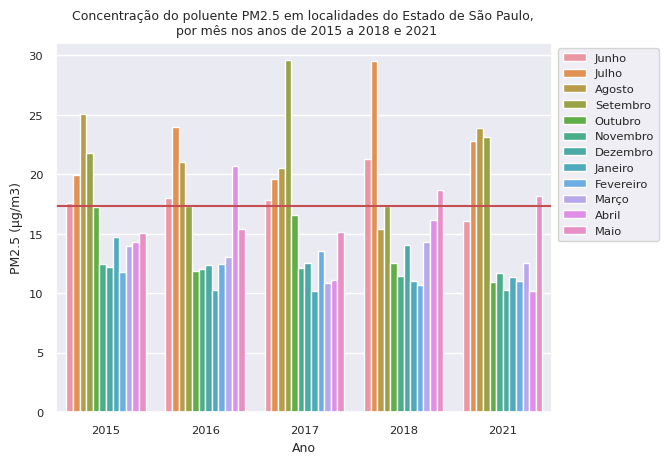

In [50]:
# Gráfico de barras referente ao PM2.5

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarMP2_5_2015_2021, errorbar=None);
plt.axhline(y=17.32, color='r', linestyle='-')
plt.title("Concentração do poluente PM2.5 em localidades do Estado de São Paulo, \n por mês nos anos de 2015 a 2018 e 2021")
plt.ylabel("PM2.5 (µg/m3)")
gfg.legend(fontsize = 4.5)
gfg.legend(bbox_to_anchor = (1,1))
plt.show();

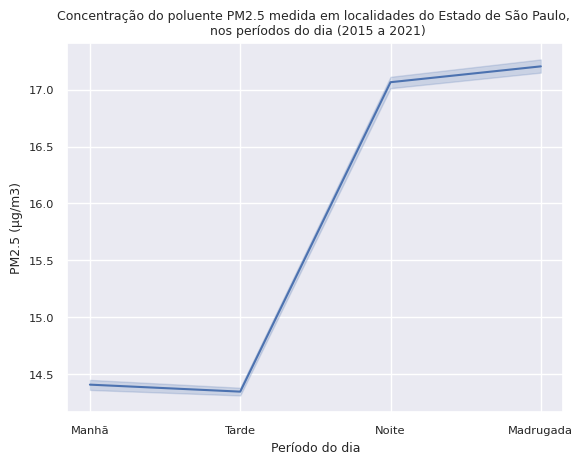

In [52]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarMP2_5)

plt.title('Concentração do poluente PM2.5 medida em localidades do Estado de São Paulo, \n nos períodos do dia (2015 a 2021)')
plt.xlabel("Período do dia")
plt.ylabel("PM2.5 (µg/m3)");

In [56]:
# Apagando as tabelas utilizadas na análise do poluente MP2.5

tabelasMP2_5 = [dadoarMP2_5,dadoarMP2_5_2015,dadoarMP2_5_2016,dadoarMP2_5_2018,dadoarMP2_5_2015_2021]
for tabela in tabelasMP10:
    del tabela

### 5.3 - Ozônio (O3)

In [57]:
# Selecionando no banco dadoarsp o poluentes O3

dadoarO3 = dadoarsp[['Data','Estacao','Poluente','Valor','Ano','estacao_ano','nmes','Mes','periodo_dia','Hora']]
dadoarO3 = dadoarO3.loc[  dadoarO3 ['Poluente'] == 'O3' ]

In [58]:
# Verificando o banco dadoarO3

dadoarO3

,Data,Estacao,Poluente,Valor,Ano,estacao_ano,nmes,Mes,periodo_dia,Hora
6659,2015-01-01,Americana - Vila Santa Maria,O3,11.0,2015,Verão,Janeiro,1,Madrugada,01:00
6660,2015-01-01,Americana - Vila Santa Maria,O3,10.0,2015,Verão,Janeiro,1,Madrugada,02:00
6661,2015-01-01,Americana - Vila Santa Maria,O3,4.0,2015,Verão,Janeiro,1,Madrugada,03:00
6662,2015-01-01,Americana - Vila Santa Maria,O3,5.0,2015,Verão,Janeiro,1,Madrugada,04:00
6663,2015-01-01,Americana - Vila Santa Maria,O3,5.0,2015,Verão,Janeiro,1,Madrugada,05:00
...,...,...,...,...,...,...,...,...,...,...
10979494,2021-12-27,Taubaté,O3,13.0,2021,Verão,Dezembro,12,Madrugada,01:00
10979495,2021-12-27,Taubaté,O3,14.0,2021,Verão,Dezembro,12,Madrugada,02:00
10979496,2021-12-27,Taubaté,O3,13.0,2021,Verão,Dezembro,12,Madrugada,03:00
10979497,2021-12-27,Taubaté,O3,13.0,2021,Verão,Dezembro,12,Madrugada,04:00


In [59]:
descricao_valor = dadoarO3['Valor'].describe()
print(descricao_valor)

count    2.647308e+06
mean     3.987700e+01
std      3.085332e+01
min      0.000000e+00
25%      1.700000e+01
50%      3.500000e+01
75%      5.600000e+01
max      7.670000e+02
Name: Valor, dtype: float64


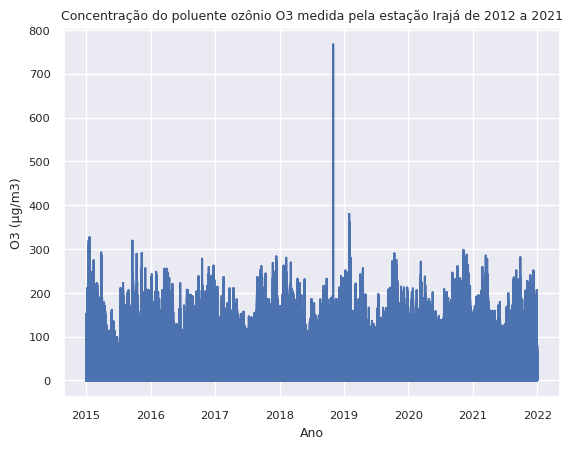

In [60]:
# Gráfico de linhas da série histórica do poluente Ozônio (O3)

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("O3 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarO3['Data'], dadoarO3['Valor'])
plt.title('Concentração do poluente ozônio O3 medida pela estação Irajá de 2012 a 2021');

In [61]:
# Selecionando valores O3 para o Ano de 2021

dadoarO3_2018 = dadoarO3[(dadoarO3['Ano'] == 2018) & (dadoarO3['Valor'] > 0)]

In [62]:
dadoarO3_2018

,Data,Estacao,Poluente,Valor,Ano,estacao_ano,nmes,Mes,periodo_dia,Hora
4784862,2018-01-01,Americana - Vila Santa Maria,O3,31.0,2018,Verão,Janeiro,1,Madrugada,01:00
4784863,2018-01-01,Americana - Vila Santa Maria,O3,27.0,2018,Verão,Janeiro,1,Madrugada,02:00
4784864,2018-01-01,Americana - Vila Santa Maria,O3,34.0,2018,Verão,Janeiro,1,Madrugada,03:00
4784865,2018-01-01,Americana - Vila Santa Maria,O3,26.0,2018,Verão,Janeiro,1,Madrugada,04:00
4784866,2018-01-01,Americana - Vila Santa Maria,O3,24.0,2018,Verão,Janeiro,1,Madrugada,05:00
...,...,...,...,...,...,...,...,...,...,...
6405250,2018-12-31,Taubaté,O3,80.0,2018,Verão,Dezembro,12,Noite,20:00
6405251,2018-12-31,Taubaté,O3,74.0,2018,Verão,Dezembro,12,Noite,21:00
6405252,2018-12-31,Taubaté,O3,71.0,2018,Verão,Dezembro,12,Noite,22:00
6405253,2018-12-31,Taubaté,O3,65.0,2018,Verão,Dezembro,12,Noite,23:00


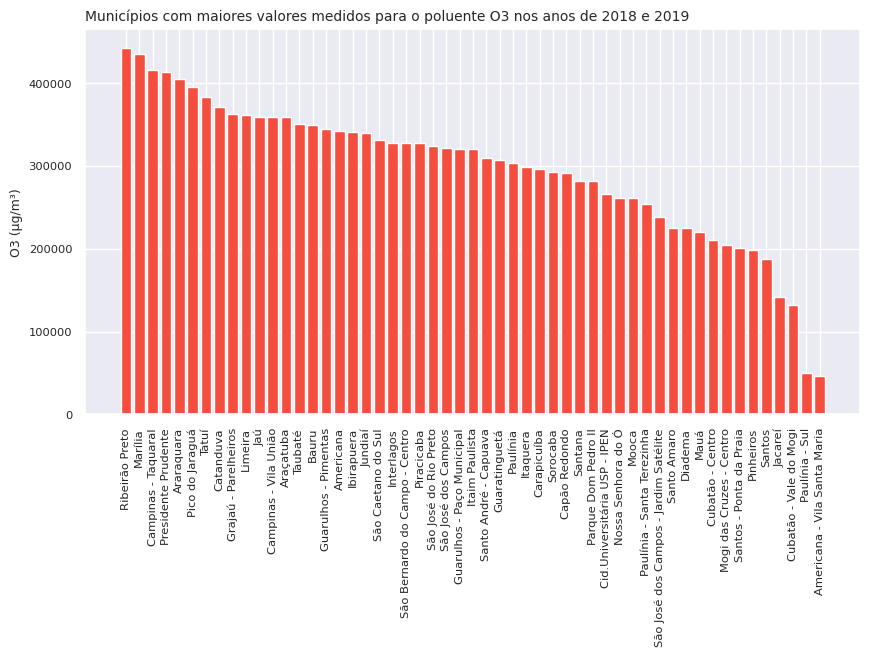

In [64]:
# analise por Municípios no ano de 2018
Graf_Munic = dadoarO3_2018.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(10,5) )
plt.title( 'Municípios com maiores valores medidos para o poluente O3 nos anos de 2018 e 2019', loc='left', fontsize=10 )
plt.bar( Graf_Munic['Estacao'], Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('O3 (µg/m³)')
plt.xticks( rotation=90 );

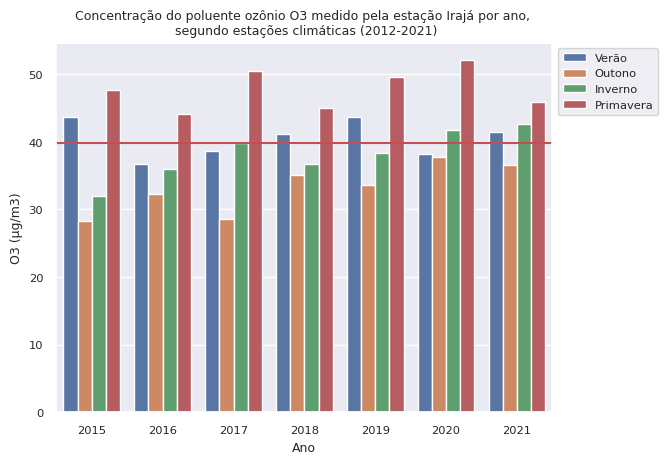

In [65]:
# Gráfico de barras referente à ozônio O3

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarO3, errorbar=None);
plt.axhline(y=39.88, color='r', linestyle='-')
plt.title("Concentração do poluente ozônio O3 medido pela estação Irajá por ano, \n segundo estações climáticas (2012-2021)")
plt.ylabel("O3 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

In [66]:
# Selecionando no banco dadoarIR_grf os Anos de 2013 e 2020

dadoarO3_2015_2020 = dadoarO3[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarO3_2015_2020 = dadoarO3_2015_2020.loc[ ( dadoarO3 ['Ano'] == 2015) | (dadoarO3 ['Ano'] == 2017 ) |
                                             ( dadoarO3 ['Ano'] == 2019) | (dadoarO3 ['Ano'] == 2020 ) ]

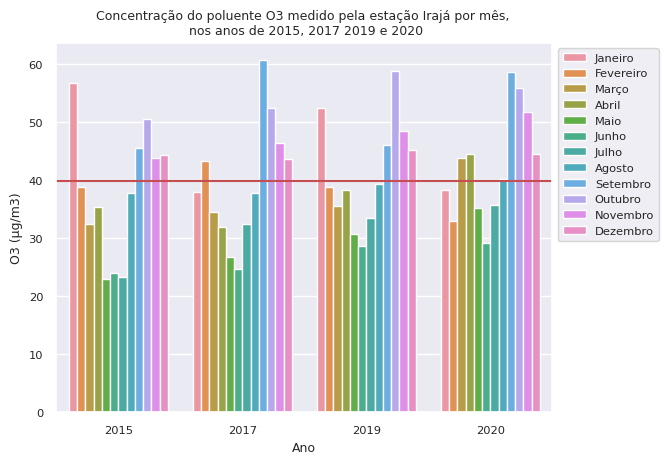

In [67]:
# Gráfico de barras referente ao O3

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarO3_2015_2020, errorbar=None);
plt.axhline(y=39.88, color='r', linestyle='-')
plt.title("Concentração do poluente O3 medido pela estação Irajá por mês, \n nos anos de 2015, 2017 2019 e 2020")
plt.ylabel("O3 (µg/m3)")
gfg.legend(fontsize = 4.5)
gfg.legend(bbox_to_anchor = (1,1))
plt.show();

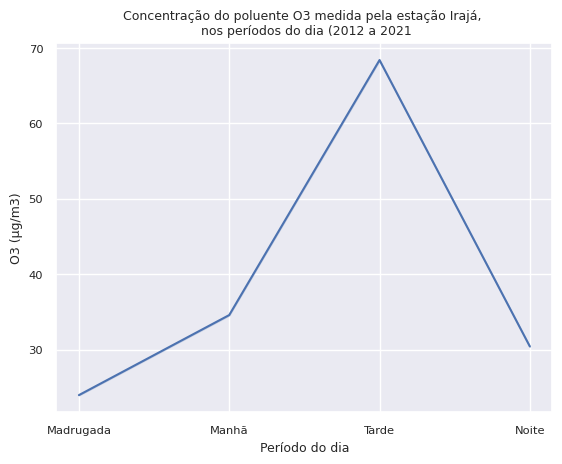

In [68]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarO3)
plt.title('Concentração do poluente O3 medida pela estação Irajá, \n nos períodos do dia (2012 a 2021')
plt.xlabel("Período do dia")
plt.ylabel("O3 (µg/m3)");

In [69]:
# Apagando as tabelas utilizadas na análise do poluente O3

tabelasO3 = [dadoarO3,dadoarO3_2018,dadoarO3_2015_2020]
for tabela in tabelasMP10:
    del tabela

### 5.4 - Dióxido de Nitrogênio (NO2)

In [70]:
# Selecionando no banco dadoarsp o poluentes NO2

dadoarNO2 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarNO2 = dadoarNO2.loc[  dadoarNO2 ['Poluente'] == 'NO2' ]

In [71]:
# Verificando o banco dadoarNO2

dadoarNO2

,Data,Estacao,Poluente,Valor,Ano,estacao_ano,Mes,nmes,periodo_dia,Hora
40258,2015-01-01,Araraquara,NO2,16.0,2015,Verão,1,Janeiro,Madrugada,02:00
40259,2015-01-01,Araraquara,NO2,17.0,2015,Verão,1,Janeiro,Madrugada,03:00
40260,2015-01-01,Araraquara,NO2,13.0,2015,Verão,1,Janeiro,Madrugada,04:00
40261,2015-01-01,Araraquara,NO2,10.0,2015,Verão,1,Janeiro,Madrugada,05:00
40262,2015-01-01,Araraquara,NO2,8.0,2015,Verão,1,Janeiro,Madrugada,06:00
...,...,...,...,...,...,...,...,...,...,...
10971495,2021-12-31,Taubaté,NO2,8.0,2021,Verão,12,Dezembro,Noite,20:00
10971496,2021-12-31,Taubaté,NO2,9.0,2021,Verão,12,Dezembro,Noite,21:00
10971497,2021-12-31,Taubaté,NO2,15.0,2021,Verão,12,Dezembro,Noite,22:00
10971498,2021-12-31,Taubaté,NO2,14.0,2021,Verão,12,Dezembro,Noite,23:00


In [72]:
descricao_valor = dadoarNO2['Valor'].describe()
print(descricao_valor)

count    2.176814e+06
mean     2.567585e+01
std      2.149372e+01
min      0.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      3.600000e+01
max      2.780000e+02
Name: Valor, dtype: float64


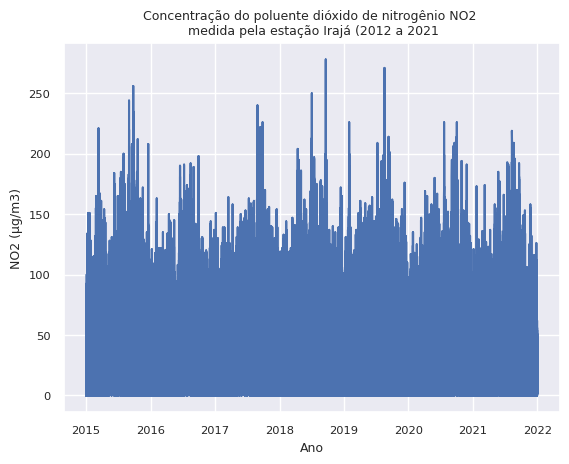

In [73]:
# Gráfico de linhas da série histórica do poluente NO2 dióxido de nitrogênio

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.ylabel("NO2 (µg/m3)")
plt.xlabel("Ano")
plt.plot(dadoarNO2['Data'], dadoarNO2['Valor'])
plt.title('Concentração do poluente dióxido de nitrogênio NO2 \n medida pela estação Irajá (2012 a 2021');

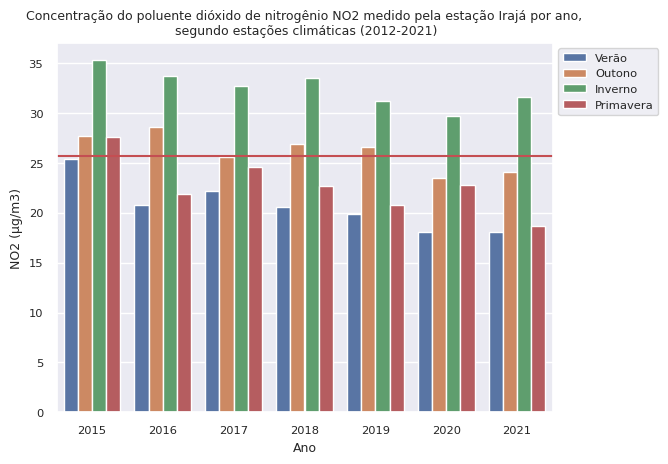

In [74]:
# Gráfico de barras referente à NO2

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "estacao_ano", data = dadoarNO2, errorbar=None);
plt.axhline(y=25.7, color='r', linestyle='-')
plt.title("Concentração do poluente dióxido de nitrogênio NO2 medido pela estação Irajá por ano,\n segundo estações climáticas (2012-2021)")
plt.ylabel("NO2 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

In [75]:
# Selecionando no banco dadoarIR_grf os Anos de 2013 e 2020

dadoarNO2_2015_2019 = dadoarNO2[['Valor','Ano','estacao_ano','Mes', 'nmes']]
dadoarNO2_2015_2019 = dadoarNO2_2015_2019.loc[ ( dadoarNO2 ['Ano'] == 2015) | ( dadoarNO2 ['Ano'] == 2016) |
                                               ( dadoarNO2 ['Ano'] == 2017) | ( dadoarNO2 ['Ano'] == 2018) |
                                               ( dadoarNO2 ['Ano'] == 2019)]

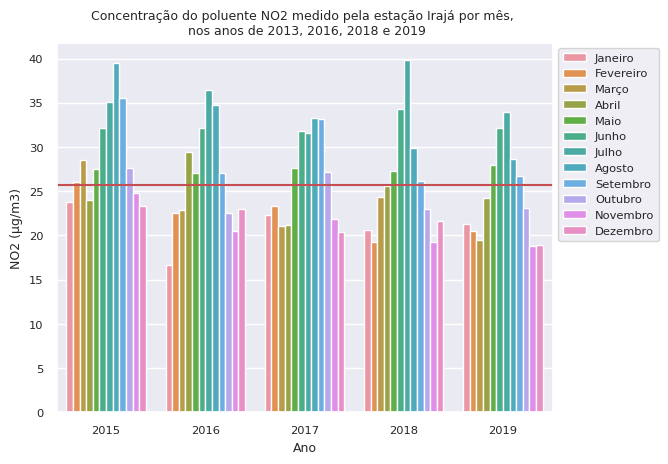

In [76]:
# Gráfico de barras referente ao poluente NO2

gfg = sns.barplot(x = "Ano", y = "Valor", hue = "nmes", data = dadoarNO2_2015_2019, errorbar=None);
plt.axhline(y=25.7, color='r', linestyle='-')
plt.title("Concentração do poluente NO2 medido pela estação Irajá por mês, \n nos anos de 2013, 2016, 2018 e 2019")
plt.ylabel("NO2 (µg/m3)")
gfg.legend(fontsize=8)
gfg.legend(bbox_to_anchor= (1,1))
plt.show();

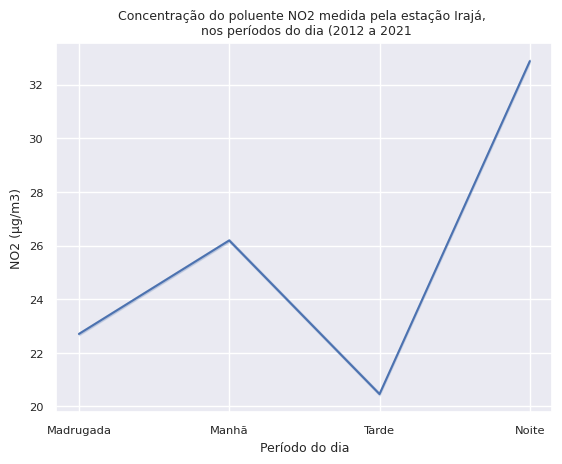

In [77]:
# Gráfico de linhas

sns.lineplot(x='periodo_dia', y='Valor', data = dadoarNO2)
plt.title('Concentração do poluente NO2 medida pela estação Irajá, \n nos períodos do dia (2012 a 2021')
plt.xlabel("Período do dia")
plt.ylabel("NO2 (µg/m3)");

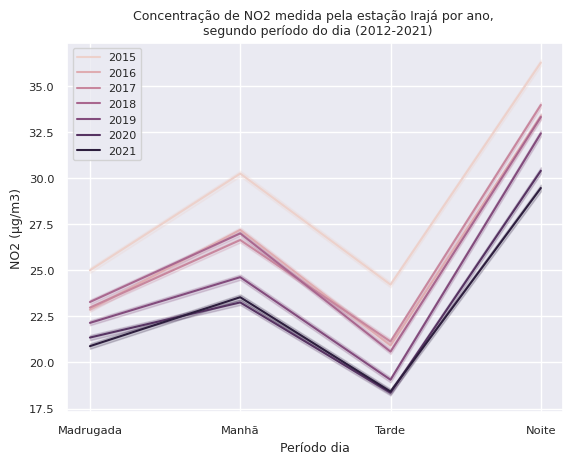

In [78]:
# Gráfico de linha da concentração de NO2 ao longo do dia

sns.lineplot(
    data=pd.DataFrame(dadoarNO2),
    x="periodo_dia", y="Valor", hue="Ano",
    sort=True
)
plt.title("Concentração de NO2 medida pela estação Irajá por ano, \n segundo período do dia (2012-2021)")
plt.xlabel("Período dia")
plt.ylabel("NO2 (µg/m3)")
plt.legend(fontsize=8);

In [79]:
# Apagando as tabelas utilizadas na análise do poluente O3

tabelasNO2 = [dadoarNO2,dadoarNO2_2015_2019]
for tabela in tabelasMP10:
    del tabela

# ***5 - Separando dados para análise com a linguagem de banco de dados SQL***

In [80]:
dadoarsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ID           int64         
 1   Data         datetime64[ns]
 2   Hora         object        
 3   Estacao      object        
 4   Codigo       object        
 5   Poluente     object        
 6   Valor        float64       
 7   Unidade      object        
 8   Tipo         object        
 9   Ano          int64         
 10  Mes          int64         
 11  nmes         object        
 12  estacao_ano  object        
 13  periodo_dia  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 1.1+ GB


In [81]:
dadoarsp['Estacao'].unique()

array(['Americana - Vila Santa Maria', 'Araçatuba', 'Araraquara', 'Bauru',
       'Campinas - Centro', 'Campinas - Taquaral',
       'Campinas - Vila União', 'Capão Redondo', 'Carapicuíba',
       'Catanduva', 'Cerqueira César', 'Cid.Universitária USP - IPEN',
       'Congonhas', 'Cubatão - Centro', 'Cubatão - Vila Parisi',
       'Cubatão - Vale do Mogi', 'Diadema', 'Grajaú - Parelheiros',
       'Guarulhos - Paço Municipal', 'Guarulhos - Pimentas', 'Ibirapuera',
       'Interlagos', 'Itaim Paulista', 'Itaquera', 'Jacareí', 'Jaú',
       'Jundiaí', 'Marg. Tietê - Pte dos Remédios', 'Marília', 'Mauá',
       'Mooca', 'Nossa Senhora do Ó', 'Osasco', 'Parque Dom Pedro II',
       'Paulínia - Sul', 'Paulínia', 'Pinheiros', 'Piracicaba',
       'Presidente Prudente', 'Santo André - Capuava',
       'Santo André - Paço Municipal', 'São Bernardo do Campo - Centro',
       'São Bernardo do Campo - Paulicéia',
       'São José dos Campos - Jardim Satélite', 'São José dos Campos',
       'Santa

In [82]:
# Separando dados do Poluente MP10 e Ano de 2021

dadoarMP10 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarMP10 = dadoarMP10.loc[  (dadoarMP10 ['Poluente'] == 'MP10') & (dadoarMP10 ['Ano'] == 2021)  ]

In [83]:
# Exportar o DataFrame para um arquivo CSV

dadoarMP10.to_csv('dadoarMP10.csv')

In [84]:
del dadoarMP10

In [85]:
# Separando dados do Poluente MP2.5 e Anos de 2016 e 2018

dadoarMP2_5 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarPM2_5 = dadoarMP2_5.loc[(dadoarMP2_5['Poluente'] == 'MP2.5') & ((dadoarMP2_5['Ano'] == 2016) | (dadoarMP2_5['Ano'] == 2018))]

In [86]:
# Exportar o DataFrame para um arquivo CSV

dadoarMP2_5.to_csv('dadoarMP2_5.csv')

In [87]:
del dadoarPM2_5

In [88]:
# Separando dados do Poluente O3 e Ano 2018

dadoarO3 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarO3 = dadoarO3.loc[  (dadoarO3 ['Poluente'] == 'O3') & (dadoarO3 ['Ano'] == 2018)  ]

In [89]:
# Exportar o DataFrame para um arquivo CSV

dadoarO3.to_csv('dadoarO3.csv')

In [90]:
del dadoarO3

In [91]:
# Separando dados do Poluente NO2 e Anos de 2018 e 2019

dadoarNO2 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano','Mes','nmes','periodo_dia','Hora']]
dadoarNO2 = dadoarNO2.loc[(dadoarNO2['Poluente'] == 'NO2') & ((dadoarNO2['Ano'] == 2018) | (dadoarNO2['Ano'] == 2019))]

In [92]:
# Exportar o DataFrame para um arquivo CSV

dadoarNO2.to_csv('dadoarNO2.csv')

In [93]:
del dadoarNO2